In [3]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [5]:
# Load the UCI-mushroom data
data = pd.read_csv("agaricus-lepiota.csv")

# Replace letters with unique dummy values which are either 0.0 or 1.0
dummies = pd.get_dummies(data, prefix=None,prefix_sep='_')

# Get first five values of the dataset
dummies.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# X contains the dummy values found earlier
X = dummies.values

sil_scores = []
print("Starting calculation...")

# We calculate the optimal amount of clusters between 2 and 30
for n_clusters in range(2, 31):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    sil_scores.append(silhouette_avg)

print("Done :-)")

Starting calculation...
Done :-)


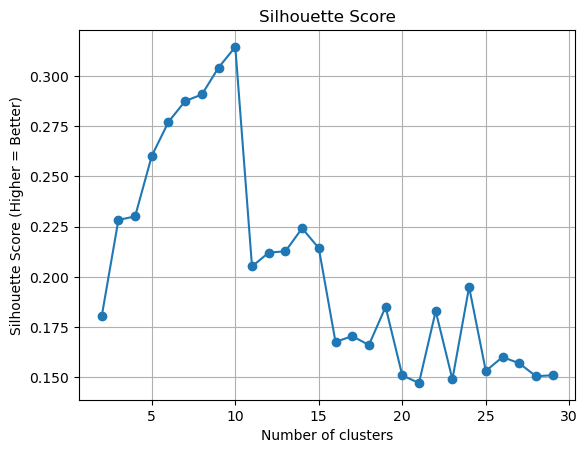

In [34]:
# Plotting Silhouette scores
plt.figure()
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score (Higher = Better)')
plt.grid()
plt.show()